In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
data = pd.read_csv("train.csv" , parse_dates=['Tarih'] , index_col='Tarih')
# data.set_index('Tarih' , drop= True , inplace=True)
data.head()

,Dağıtılan Enerji (MWh)
Tarih,
2018-01-01 00:00:00,1593.944216
2018-01-01 01:00:00,1513.933887
2018-01-01 02:00:00,1402.612637
2018-01-01 03:00:00,1278.527266
2018-01-01 04:00:00,1220.697701


In [3]:
future_data = pd.read_csv("future.csv", parse_dates=['Tarih'] , index_col= 'Tarih').drop('Unnamed: 0' , axis = 1)
future_data.head()

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,NaN
2022-08-01 01:00:00,NaN
2022-08-01 02:00:00,NaN
2022-08-01 03:00:00,NaN
2022-08-01 04:00:00,NaN


In [4]:
med = pd.read_csv('med.csv')
med['Tarih'] = pd.to_datetime(med['Tarih'])
med.head()

,Tarih
0,2019-12-23
1,2019-06-12
2,2019-01-25
3,2019-09-25
4,2019-03-29


# Describe the Data

In [5]:
data.shape

(40152, 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40152 entries, 2018-01-01 00:00:00 to 2022-07-31 23:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dağıtılan Enerji (MWh)  40152 non-null  float64
dtypes: float64(1)
memory usage: 627.4 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dağıtılan Enerji (MWh),40152.0,1836.805287,426.066085,870.18328,1499.165048,1813.409221,2129.407998,3633.105297


# Plot the Data

# Train | Test Split

In [8]:
# # split into train and test sets

# n_train_time = 1460*24
# train = values[:n_train_time, :]
# test = values[n_train_time:, :]

In [9]:
# X_data = data.copy()
X_test_temp = data.loc[data.index > '2022-02-23 23:00:00'].copy()
X_train_temp = data.loc[data.index <= '2022-02-23 23:00:00'].copy()

# X_val_temp = X_train_temp[-144:]
# X_train_temp = X_train_temp[:-144]

In [10]:
# # split into input and outputs
# X_train, y_train = train[:, :], train[:, 0]
# X_test, y_test = test[:, :], test[:, 0]

In [11]:
# print(f"X_data Shape : {X_data.shape}")
print(f"Full data shape : {data.shape}")
print(f"X_train Shape : {X_train_temp.shape}")
print(f"X_test Shape : {X_test_temp.shape}")
# print(f"X_val Shape : {X_val_temp.shape}")
# print(f"X Shape : {X.shape}")

Full data shape : (40152, 1)
X_train Shape : (36360, 1)
X_test Shape : (3792, 1)


# Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
X_train_scaled = scaler.transform(X_train_temp)
X_test_scaled = scaler.transform(X_test_temp)

# Reshape and Sequence

Buraya dikkat

In [13]:
def packager(data_scaled , train_scaled, X_test_scaled, window_size=24):
    X_data , y_data , X_train, y_train, X_test, y_test = [], [], [], [], [], []
    
    
    for i in range(window_size, len(data_scaled)):
        X_data.append(data_scaled[i-window_size:i, 0])
        y_data.append(data_scaled[i, 0])

    for i in range(window_size, len(train_scaled)):
        X_train.append(train_scaled[i-window_size:i, 0])
        y_train.append(train_scaled[i, 0])

    # for i in range(window_size, len(val_scaled)):
    #     X_val.append(val_scaled[i-window_size:i, 0])
    #     y_val.append(val_scaled[i, 0])

    for i in range(window_size, len(X_test_scaled)):
        X_test.append(X_test_scaled[i-window_size:i, 0])
        y_test.append(X_test_scaled[i, 0])

    X_data, y_data = np.array(X_data), np.array(y_data)
    X_train, y_train = np.array(X_train), np.array(y_train)
    # X_val, y_val = np.array(X_val), np.array(y_val)
    X_test, y_test = np.array(X_test), np.array(y_test)

    X_data = np.reshape(X_data, (X_data.shape[0], X_train.shape[1], 1))
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    # X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # X = np.concatenate((X_train, X_test), axis=0)
    # y = np.concatenate((y_train, y_test), axis=0)

    return X_data , y_data , X_train, y_train, X_test, y_test

In [14]:
X_data , y_data , X_train, y_train, X_test, y_test = packager(data_scaled , X_train_scaled, X_test_scaled, 24)

In [15]:
print(f"X_data Shape : {X_data.shape}")
print(f"y_data Shape : {y_data.shape}\n\n")
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}\n\n")
print(f"X_test Shape : {X_test.shape}")
print(f"y_test Shape : {y_test.shape}")

X_data Shape : (40128, 24, 1)
y_data Shape : (40128,)


X_train Shape : (36336, 24, 1)
y_train Shape : (36336,)


X_test Shape : (3768, 24, 1)
y_test Shape : (3768,)


# Final Model

In [16]:
import tensorflow as tf

# Seed ayarlamak
seed_value = 53
tf.keras.utils.set_random_seed(seed_value)

# Manual Modelling

In [17]:
import tensorflow as tf

In [18]:
X_train.shape

(36336, 24, 1)

In [19]:
# window_size = 24
# batch_size = 8

from keras.models import Sequential
from keras.layers import LSTM, Dense , BatchNormalization , Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
from keras.optimizers import Adam
from keras import backend as K
from keras.losses import MeanAbsolutePercentageError


# Model oluşturma
model = Sequential()
# model.add(LSTM(50, input_shape=(window_size, data.shape[1]) ,return_sequences = False))
model.add(LSTM(24, activation='tanh' , input_shape = (X_train.shape[1],X_train.shape[2]) ,return_sequences=True))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(LSTM(12, activation='tanh' ,return_sequences=False))
# # model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(LSTM(4, return_sequences=False))
# model.add(BatchNormalization())
# model.add(LSTM(4 , activation = 'tanh' , return_sequences=False))
model.add(Dense(1))

opt = Adam(learning_rate = 0.001)
model.compile(loss= MeanAbsolutePercentageError(), optimizer=opt)



reduce_lr = ReduceLROnPlateau(factor = 0.1 , patience=5)
early_stop = EarlyStopping(monitor='val_loss' , patience=7)
model_check = ModelCheckpoint(filepath=r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\16-8-4(batch1)\\model-{epoch:03d}-{val_loss:.5f}.h5', monitor="val_loss", verbose=1)

# # Modeli eğitme
# model.fit(X_train , y_train, epochs=30, batch_size = batch_size , validation_data=(X_test , y_test) , callbacks= [reduce_lr , early_stop , model_check] , shuffle=False )
history = model.fit(X_data, y_data, epochs=50, batch_size= 1, validation_split=0.1, callbacks= [reduce_lr , early_stop, model_check] , shuffle=False)


# Modeli değerlendirme
mape_score = model.evaluate(X_test, y_test)
print('Test MAPE: %.3f' % mape_score)

Epoch 1/50
36108/36115 [============================>.] - ETA: 0s - loss: 1655.0848
Epoch 1: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\16-8-4(batch1)\model-001-8.36445.h5
36115/36115 [==============================] - 127s 3ms/step - loss: 1654.7644 - val_loss: 8.3645 - lr: 0.0010
Epoch 2/50
36114/36115 [============================>.] - ETA: 0s - loss: 613.7236
Epoch 2: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\16-8-4(batch1)\model-002-8.23655.h5
36115/36115 [==============================] - 125s 3ms/step - loss: 613.7065 - val_loss: 8.2366 - lr: 0.0010
Epoch 3/50
36114/36115 [============================>.] - ETA: 0s - loss: 128.3951
Epoch 3: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\16-8-4(batch1)\model-003-10.42675.h5
36115/36115 [==============================] - 125s 3ms/step - loss: 128.3917 - val_loss: 10.4268 - lr: 0.0010
Epoch 4/50
36100/3

# Import the Model

In [49]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\24-12(batch1)\\model-026-6.00443.h5")

In [ ]:
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()

# Eval Metric

In [50]:
from eval_metrics import eval_metrics, preds_plot

# Prediction

In [51]:
data_scaled.shape

(40152, 1)

In [52]:
data_scaled[-24:]

array([[0.47908779],
       [0.4288069 ],
       [0.3831254 ],
       [0.35403546],
       [0.3324743 ],
       [0.32189776],
       [0.28547734],
       [0.29602315],
       [0.33506572],
       [0.38727872],
       [0.44141993],
       [0.49458998],
       [0.51972283],
       [0.54963039],
       [0.56800422],
       [0.57301122],
       [0.58425741],
       [0.58924705],
       [0.59589376],
       [0.58717047],
       [0.58263496],
       [0.58446586],
       [0.55245532],
       [0.51216413]])

In [53]:
data_last_seq = data_scaled[-24:]

In [54]:
data_last_seq.shape

(24, 1)

In [55]:
# Elimizdeki verilerin son 24'ü bir sonraki tahmini yapmak için kullanılacak
last_window = data_last_seq.copy()

# 31 gün boyunca tahminler yapmak için bir boş tahmin dizisi oluşturun
predictions = []

for i in range(31*24):
    # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
    last_window_reshaped = last_window.reshape(1, 24, 1)

    # Son pencereyi kullanarak bir tahmin yapın
    prediction = model.predict(last_window_reshaped , verbose = 0)[0][0]

    # Tahmini tahmin listesine ekleyin
    predictions.append(prediction)

    # Tahmin edilen değeri son pencerenin sonuna ekleyin
    last_window = np.append(last_window[1:], prediction)
    
# Tahminleri geri ölçeklendirin
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Tahminlerinizi burada kullanabilirsiniz

In [56]:
predictions

array([[ 2133.8875   ],
       [ 1973.8843   ],
       [ 1816.6674   ],
       [ 1670.9564   ],
       [ 1553.9158   ],
       [ 1469.8064   ],
       [ 1411.5953   ],
       [ 1377.2454   ],
       [ 1382.5968   ],
       [ 1451.0004   ],
       [ 1609.9775   ],
       [ 1824.3457   ],
       [ 1979.8335   ],
       [ 2068.7578   ],
       [ 2121.9814   ],
       [ 2154.438    ],
       [ 2175.5823   ],
       [ 2189.5955   ],
       [ 2197.147    ],
       [ 2199.4016   ],
       [ 2194.6375   ],
       [ 2177.765    ],
       [ 2147.546    ],
       [ 2099.5645   ],
       [ 2027.943    ],
       [ 1928.3005   ],
       [ 1803.3547   ],
       [ 1663.8472   ],
       [ 1527.3357   ],
       [ 1407.3414   ],
       [ 1311.2224   ],
       [ 1240.0721   ],
       [ 1193.6304   ],
       [ 1168.0872   ],
       [ 1157.0363   ],
       [ 1177.7611   ],
       [ 1265.5424   ],
       [ 1404.2942   ],
       [ 1526.4651   ],
       [ 1617.7      ],
       [ 1694.1478   ],
       [ 1759.35

### Visualize Predictions

In [57]:
from eval_metrics import preds_plot

In [58]:
future_data['Dağıtılan Enerji (MWh)'] = predictions
future_data

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2133.887451
2022-08-01 01:00:00,1973.884277
2022-08-01 02:00:00,1816.667358
2022-08-01 03:00:00,1670.956421
2022-08-01 04:00:00,1553.915771
...,...
2022-08-31 19:00:00,1980.630127
2022-08-31 20:00:00,2142.908203
2022-08-31 21:00:00,2218.929199


In [59]:
target_data = data[data.index.month == 8]

In [60]:
target_data_2018 = target_data[target_data.index.year == 2018]
target_data_2019 = target_data[target_data.index.year == 2019]
target_data_2020 = target_data[target_data.index.year == 2020]
target_data_2021 = target_data[target_data.index.year == 2021]

In [61]:
data

,Dağıtılan Enerji (MWh)
Tarih,
2018-01-01 00:00:00,1593.944216
2018-01-01 01:00:00,1513.933887
2018-01-01 02:00:00,1402.612637
2018-01-01 03:00:00,1278.527266
2018-01-01 04:00:00,1220.697701
...,...
2022-07-31 19:00:00,2492.489498
2022-07-31 20:00:00,2479.958245
2022-07-31 21:00:00,2485.016884


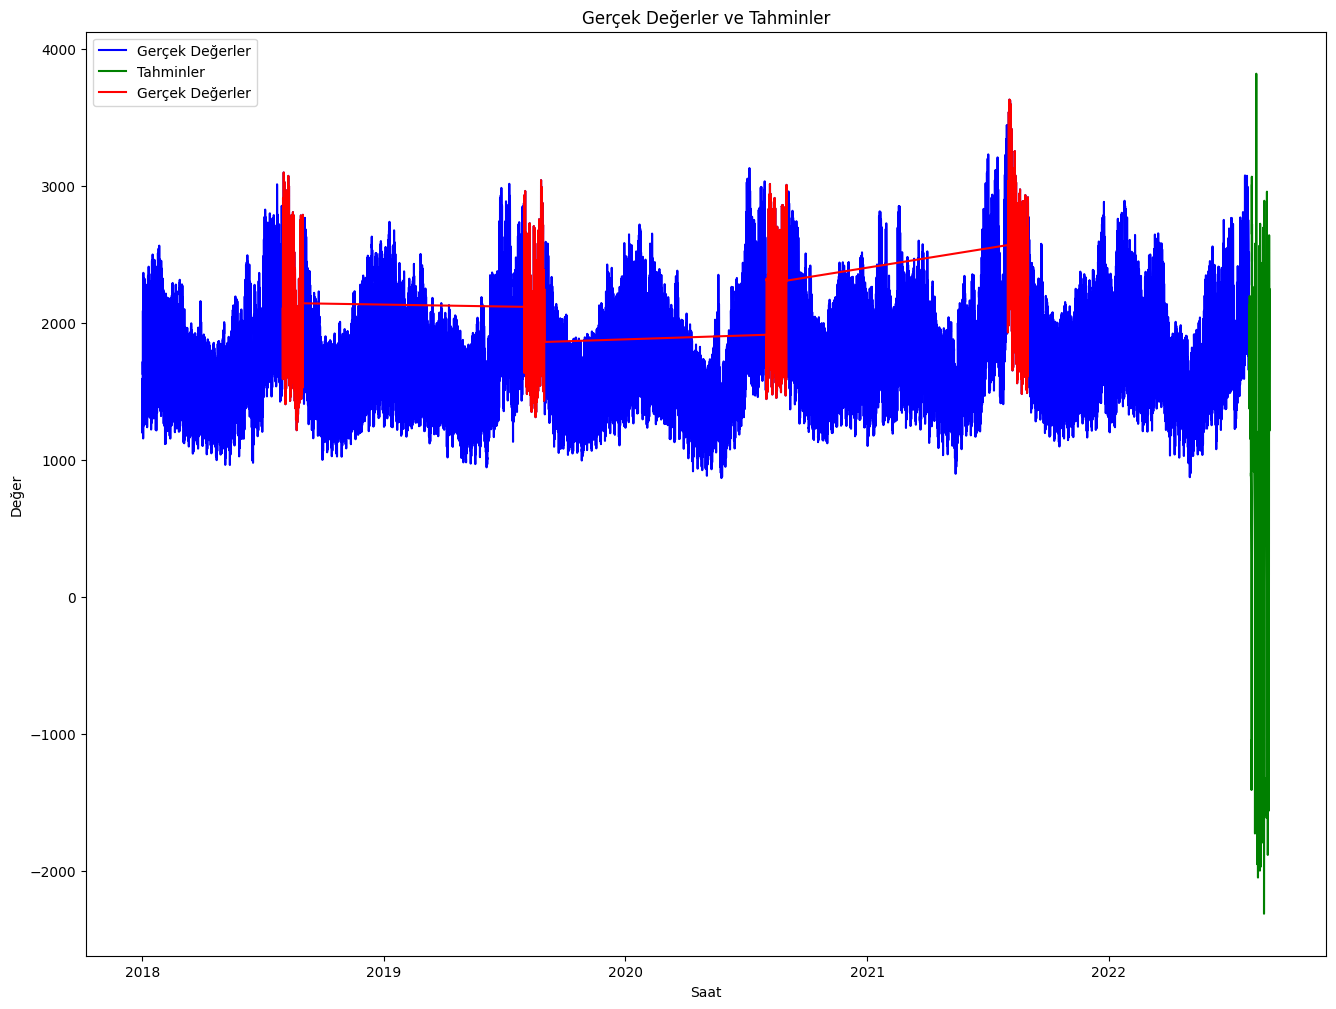

In [62]:
plt.figure(figsize=(16,12))
preds_plot(data , future_data , target_data )

In [ ]:
# Done